# Beta Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Ali Chegini   

*SID:* 810801064

The objective of this notebook is to estimate the probability of getting tails in a coin flip using a Bayesian approach.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union

In [3]:
from scipy.special import gamma
import math

class BetaDistribution:
    """
    Represents a beta distribution with the given shape parameters.
    """

    def __init__(self, alpha: float, beta: float):
        """
        Args:
            alpha (float): The first shape parameter of the beta distribution.
            beta (float): The second shape parameter of the beta distribution.
        """

        ######################  TODO  ########################
        self.alpha = alpha
        self.beta = beta
        self.normalization_constant = self.__calculate_normalization_constant()
        ######################  TODO  ########################

    def __calculate_normalization_constant(self):
        """
        Calculates the normalization constant for the beta distribution.
        This constant is used to ensure that the total probability under the PDF is 1.
        """
        ######################  TODO  ########################
        # Proceed with the numerical approach
        return math.factorial(self.alpha) * math.factorial(self.beta) / math.factorial(self.alpha + self.beta)
        ######################  TODO  ########################

    def pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the normalized probability density function (PDF) of the beta distribution at the given input value(s).
        Args:
            x (float or np.ndarray): The input value(s) to evaluate the beta distribution PDF at.
        Returns:
            pdf (float or np.ndarray): The normalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        unnormalized_pdf = self.__unnormalized_pdf(x)
        return unnormalized_pdf / self.normalization_constant
        ######################  TODO  ########################

    def __unnormalized_pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the unnormalized probability density function (PDF) of the beta distribution at the given input value(s).

        Args:
            x (float or np.ndarray): The input value(s) to evaluate the unnormalized beta distribution PDF at.

        Returns:
            pdf (float or np.ndarray): The unnormalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        return np.power(x, self.alpha - 1) * np.power(1 - x, self.beta - 1)

        ######################  TODO  ########################
   

In [4]:
def plot_beta_dist(beta: BetaDistribution):
    """
    Plots the probability density function of the given beta distribution.

    Args:
        beta (BetaDistribution): The beta distribution instance to plot.
    """
    ######################  TODO  ########################
    # Do not forget to add title, labels, and legend.

    x = np.linspace(0, 1, 500)
 

    plt.plot(x, beta.pdf(x), label="beta distro", color = 'red')
    plt.title("Beta Distribution plot")
    plt.xlabel("X")
    plt.ylabel("PDF(X)")
    plt.grid()
    plt.legend()
    ######################  TODO  ########################

Read the `coint_flips.txt` file and plot the posterior distributions after every 50 trials for two prior probabilities:
1. Uniform distribution 
2. $Beta (4, 10)$

In [5]:
######################  TODO  ########################
# Read coin_flips.txt
with open('data/coin_flips.txt', 'r') as file:
    coin_flips = file.read().splitlines()

from scipy.stats import beta

def find_new_posterior(prior_alpha, prior_beta, flips):
    num_of_heads = flips.count("H")
    num_of_tails = flips.count("T")

    posterior_alpha = prior_alpha + num_of_heads
    posterior_beta = prior_beta + num_of_tails

    return posterior_alpha, posterior_beta

######################  TODO  ########################

## Prior: Uniform

**Hint:** use `plt.figure(figsize=(25, 20))` and `plt.subplot(4, 5, ...)`

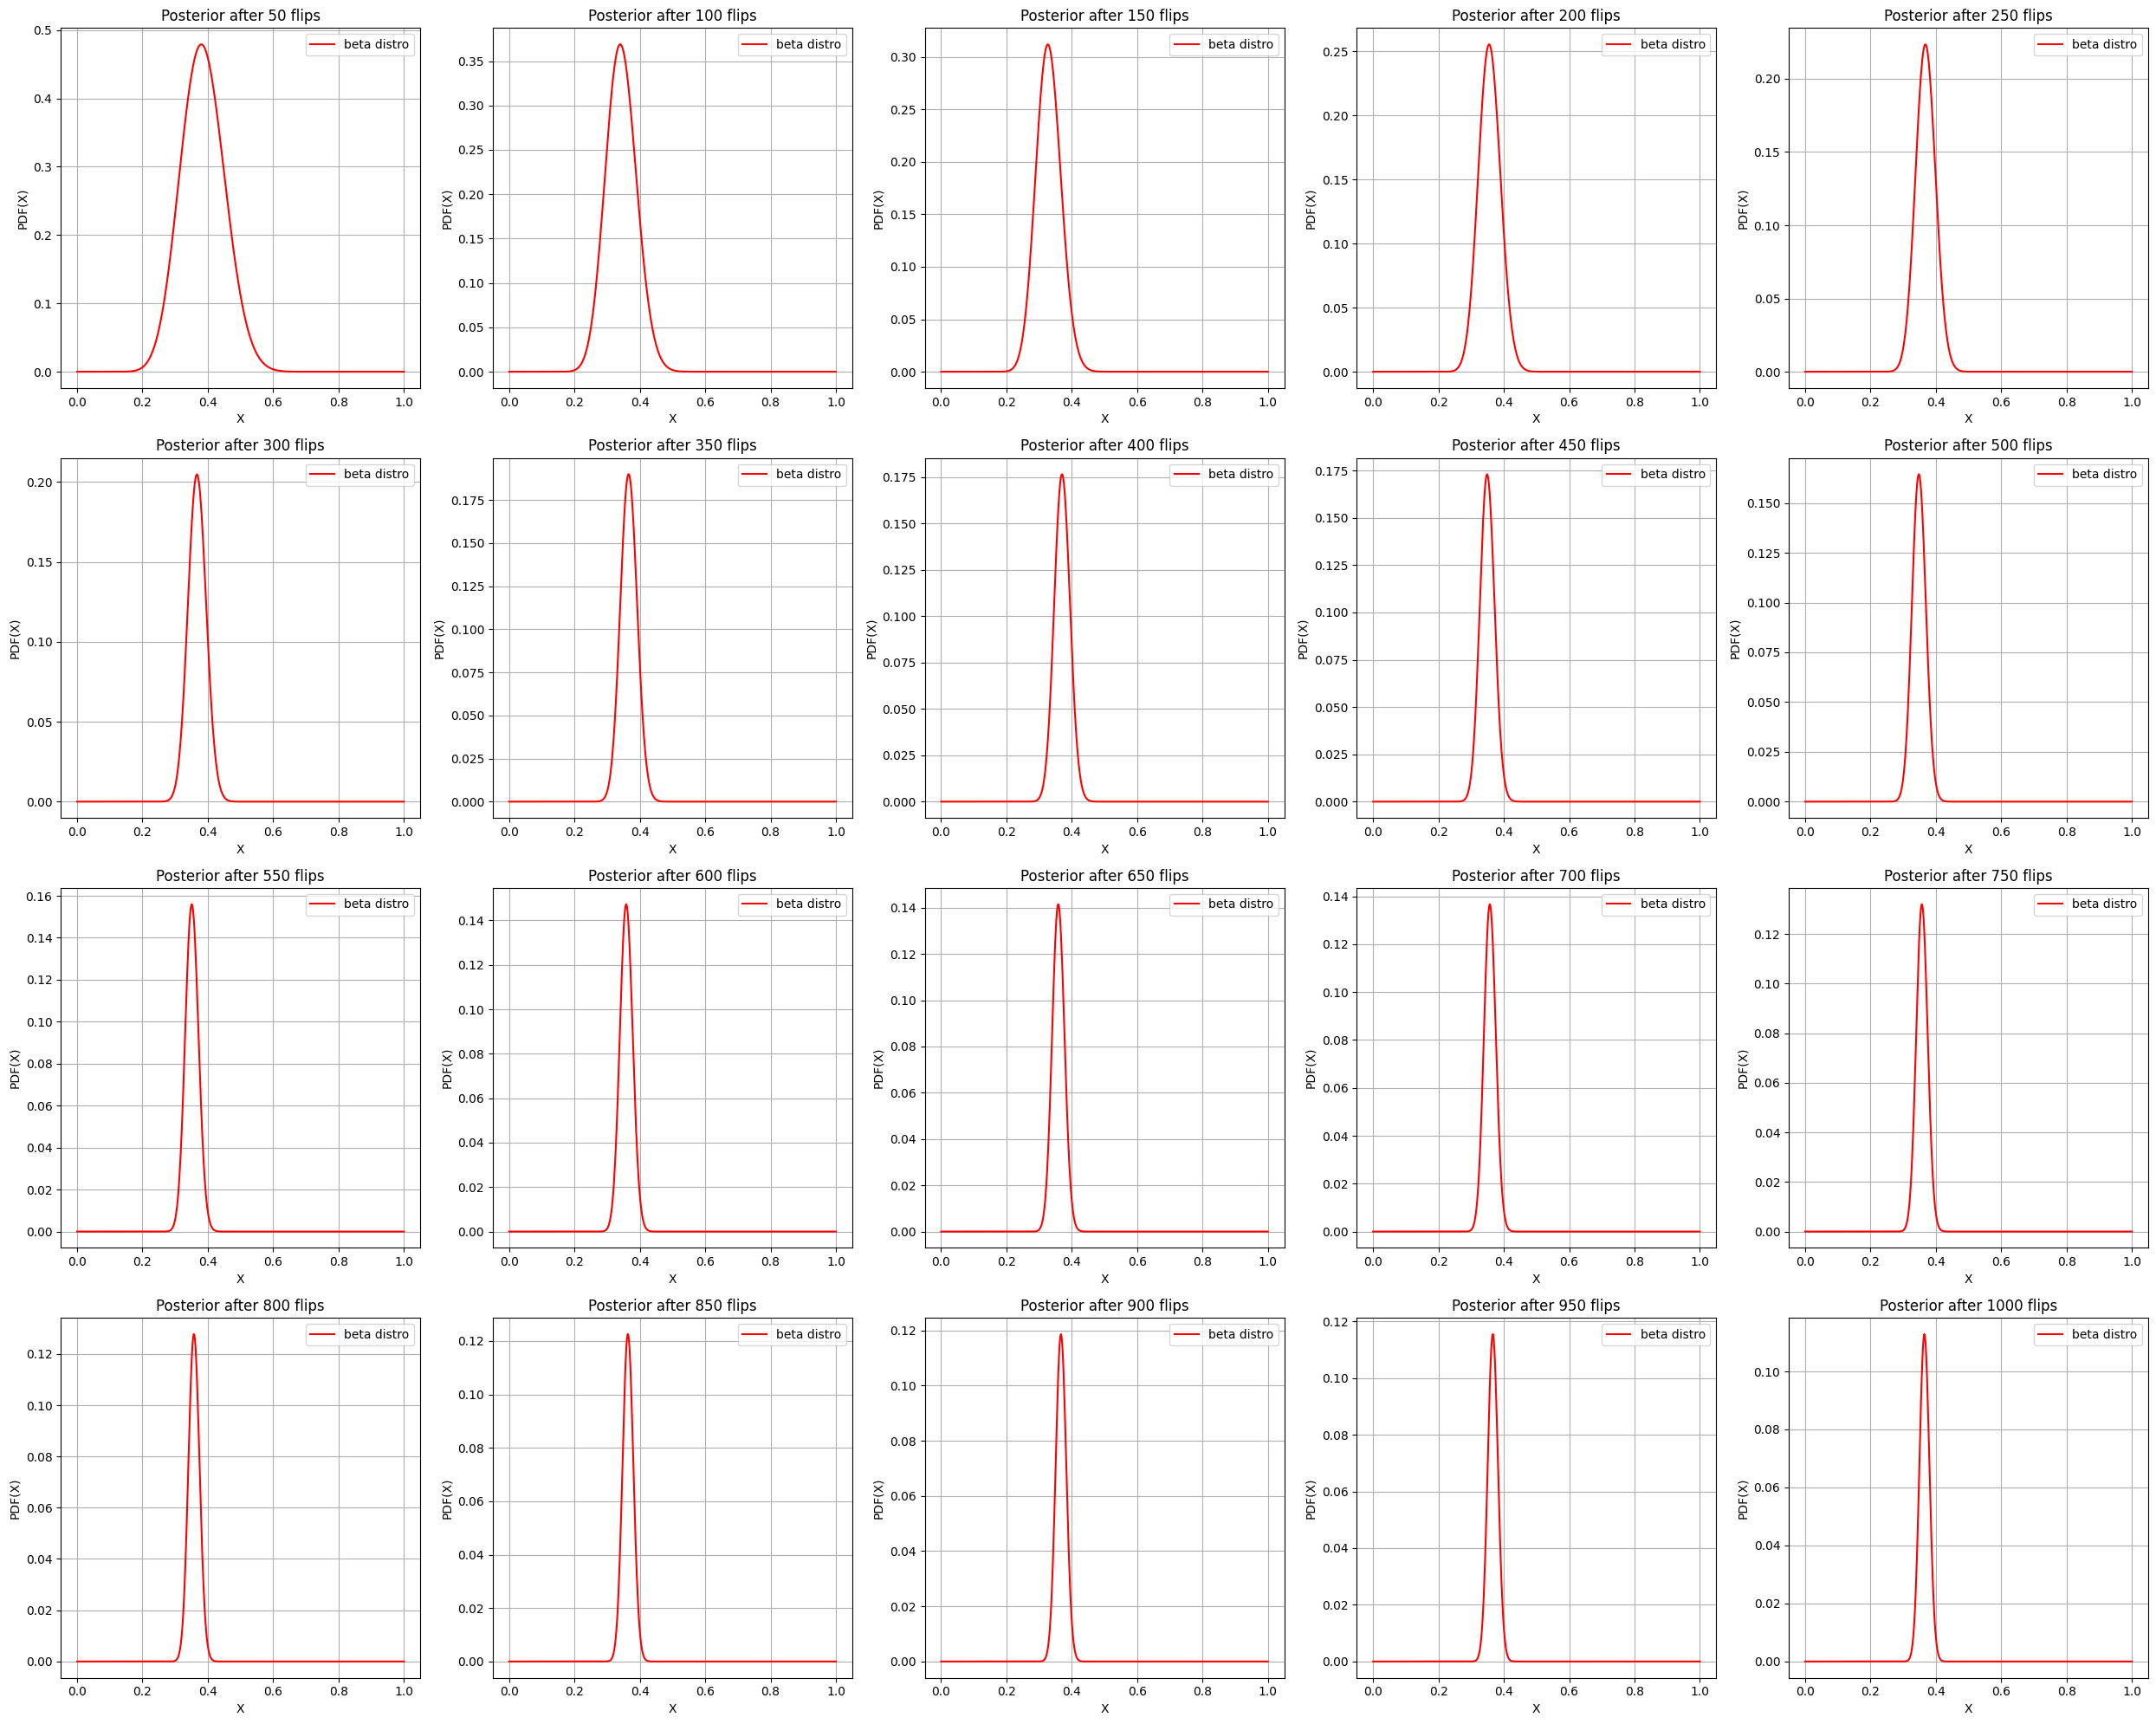

In [6]:
######################  TODO  ########################
prior_alpha = 1
prior_beta = 1
num_of_trials = 50

plt.figure(figsize=(25, 20))

rows = 4
cols = 5

subplot_counter = 1

for i in range(0, len(coin_flips), num_of_trials):
    coinflips_undertest = coin_flips[i:i + num_of_trials]
    
    posterior_alpha, posterior_beta = find_new_posterior(prior_alpha, prior_beta, coinflips_undertest)
    
    beta_dist = BetaDistribution(posterior_alpha, posterior_beta)
    plt.subplot(rows, cols, subplot_counter)
    plot_beta_dist(beta_dist)
    plt.title(f"Posterior after {i + num_of_trials} flips")
    subplot_counter += 1
    prior_alpha, prior_beta = posterior_alpha, posterior_beta

plt.tight_layout()
plt.show()
######################  TODO  ########################

Now calculate the final posterior mean and variance.

In [7]:
######################  TODO  ########################
a = posterior_alpha
b = posterior_beta
final_posterior_mean = a / (a + b)
final_posterior_variance = (a * b) / (np.power(a + b, 2) * (a + b + 1))
print(f"The final posterior mean is: {final_posterior_mean}")
print(f"the final posterior variance is: {final_posterior_variance}")
######################  TODO  ########################

The final posterior mean is: 0.3652694610778443
the final posterior variance is: 0.00023115421922407326


## Prior: $Beta(4, 10)$

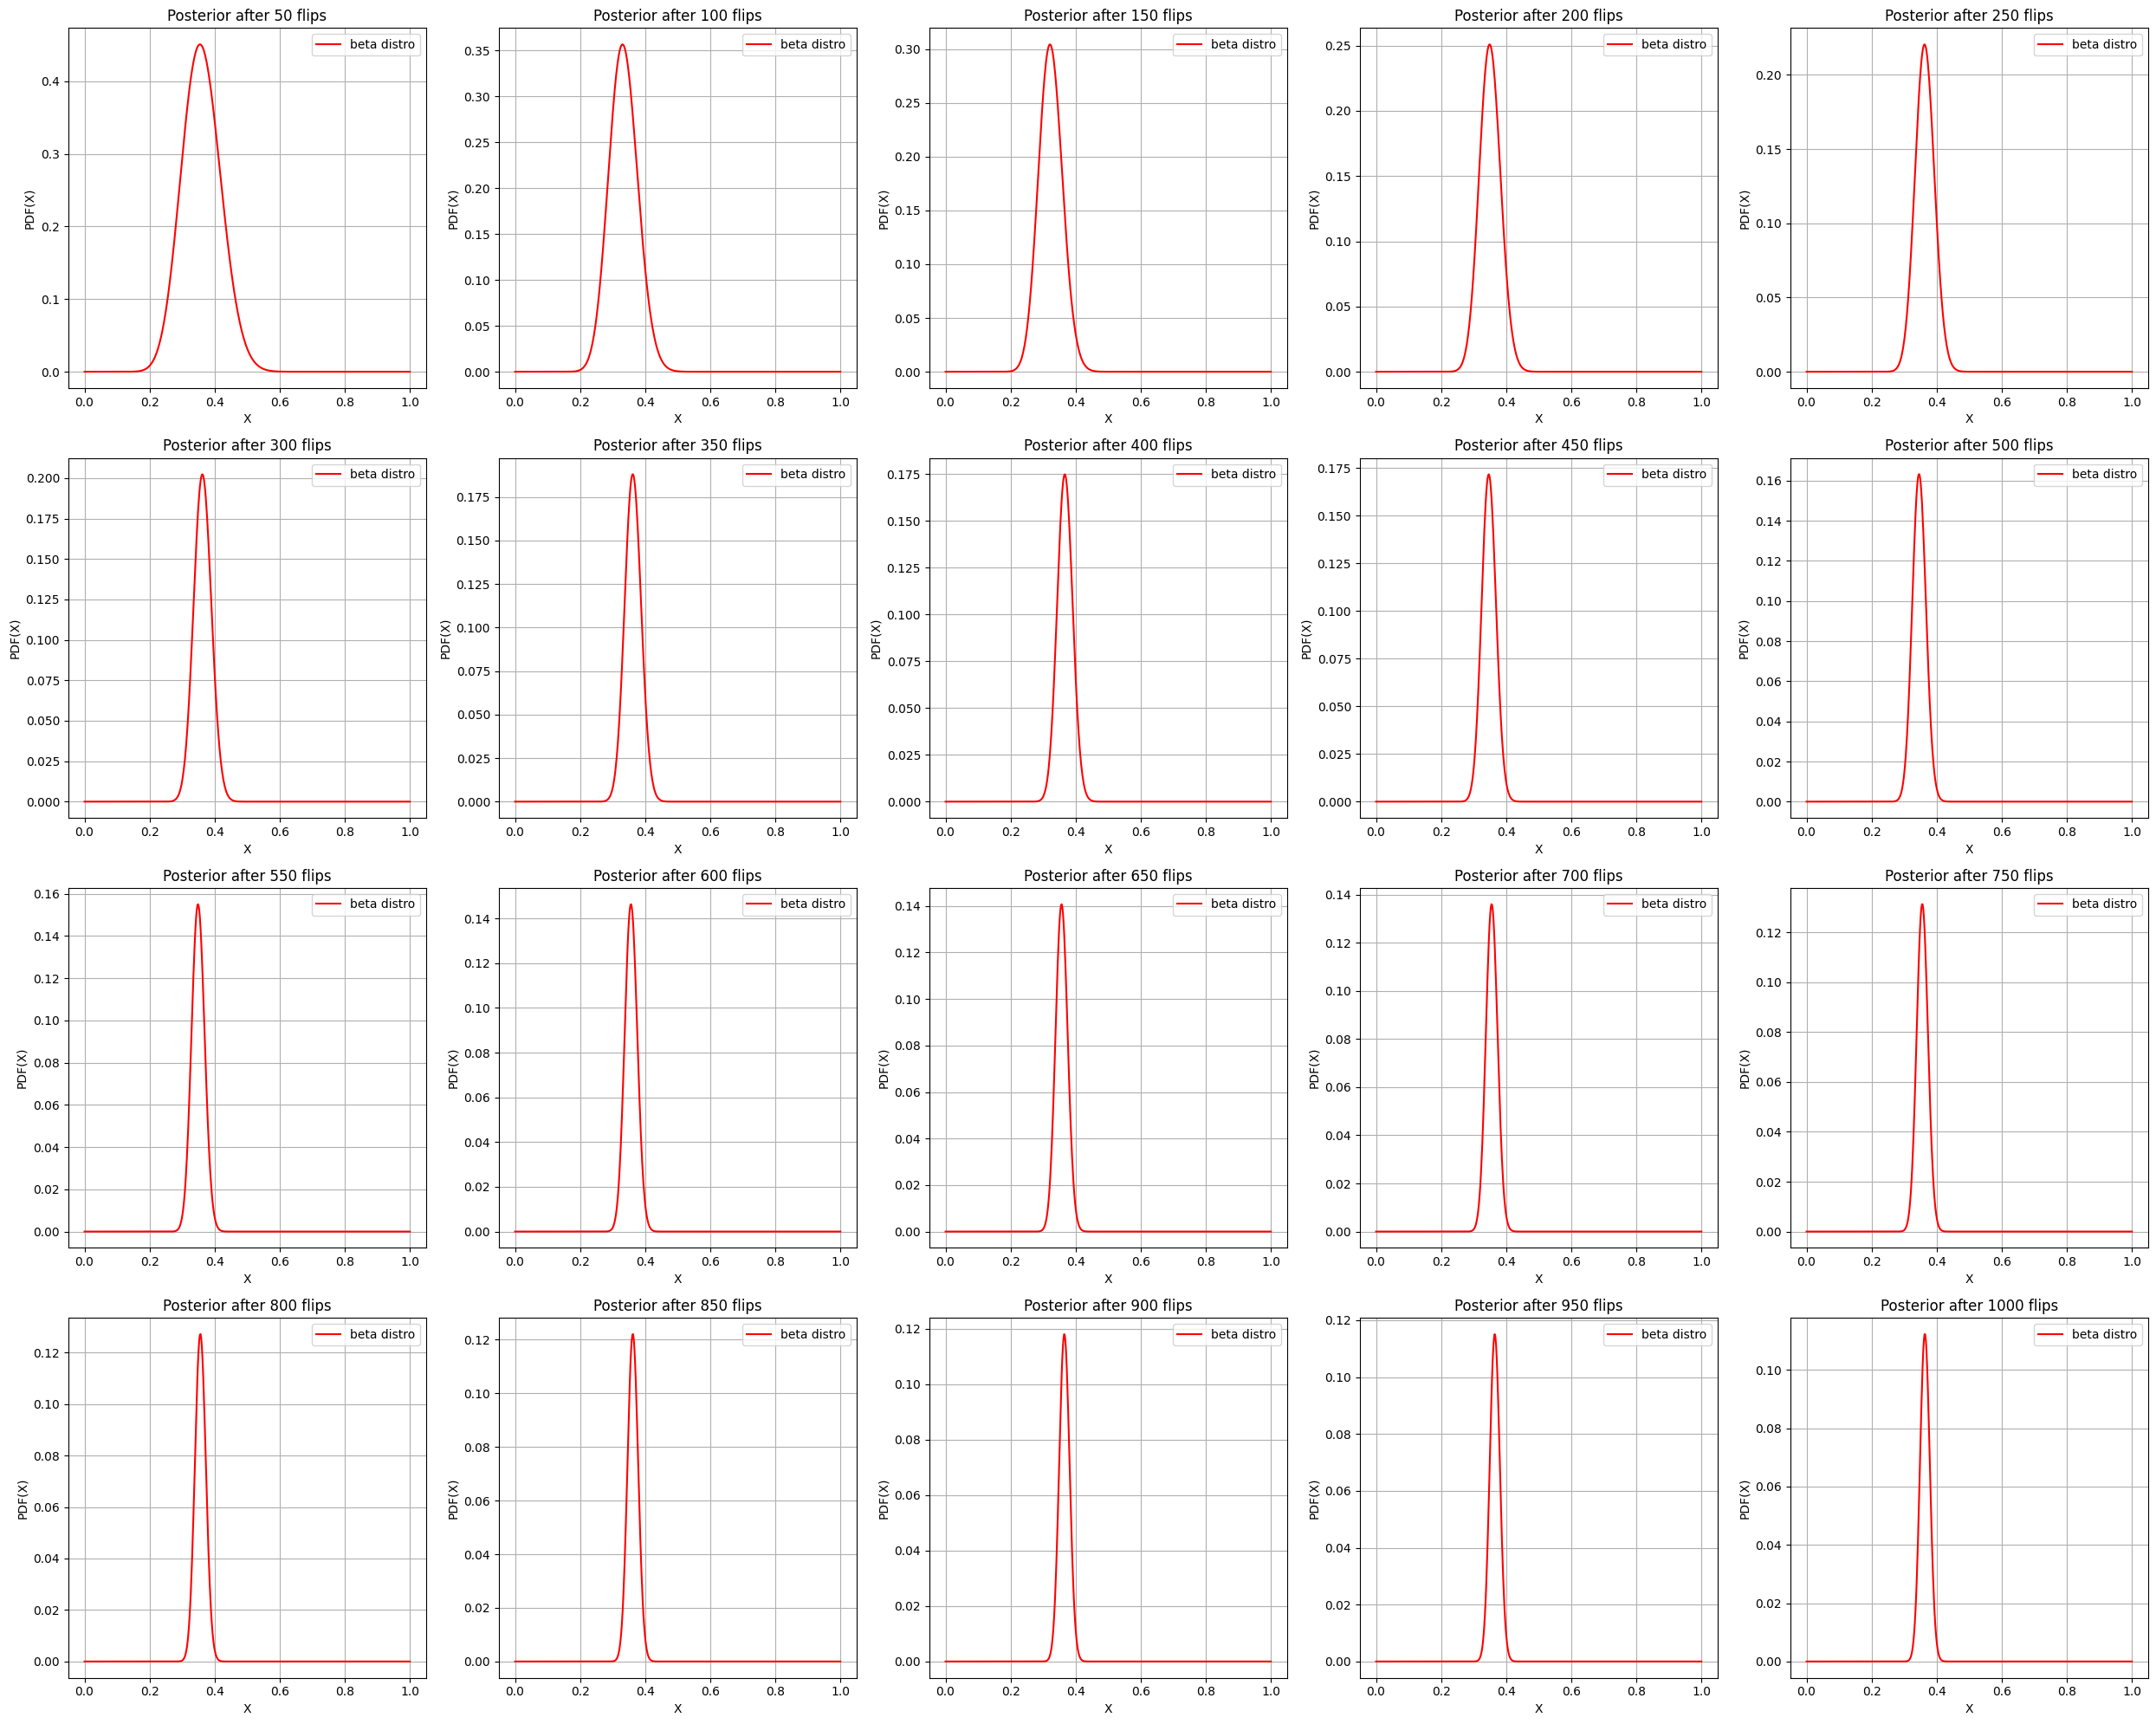

In [8]:
######################  TODO  ########################
######################  TODO  ########################
prior_alpha = 4
prior_beta = 10
num_of_trials = 50

plt.figure(figsize=(25, 20))

rows = 4
cols = 5

subplot_counter = 1

for i in range(0, len(coin_flips), num_of_trials):
    coinflips_undertest = coin_flips[i:i + num_of_trials]
    
    posterior_alpha, posterior_beta = find_new_posterior(prior_alpha, prior_beta, coinflips_undertest)
    
    beta_dist = BetaDistribution(posterior_alpha, posterior_beta)
    plt.subplot(rows, cols, subplot_counter)
    plot_beta_dist(beta_dist)
    plt.title(f"Posterior after {i + num_of_trials} flips")
    subplot_counter += 1
    prior_alpha, prior_beta = posterior_alpha, posterior_beta

plt.tight_layout()
plt.show()
######################  TODO  ########################
######################  TODO  ########################

Now calculate the final posterior mean and variance.

In [9]:
######################  TODO  ########################
a = posterior_alpha
b = posterior_beta
final_posterior_mean = a / (a + b)
final_posterior_variance = (a * b) / (np.power(a + b, 2) * (a + b + 1))
print(f"The final posterior mean is: {final_posterior_mean}")
print(f"the final posterior variance is: {final_posterior_variance}")
######################  TODO  ########################

The final posterior mean is: 0.363905325443787
the final posterior variance is: 0.0002280573788743236


## Analysis

in the first condition starting with $Beta(1, 1)$ or so called Uniform distribution , the prior repressents complete uncertainty, meaning that it does not favor any particlar probablity .  
in the second condition starting with $Beta(4, 10)$ the prior reflects an informed belief that the probablity is more likely to be closer to smaller probablities.  
After observing 1000 flip coins , it is time for the data to show its impact on our probablity density and prior in both condition dimineshes .  
and by looking at the values of mean and variance in both conditions we can see that the numbers are very close to each other and the reason to that is that after observing 1000 flip coin data , the influence of prior will be very small and the outcome will be dominated by the observed data.